In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [6]:
# Creating X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [9]:
batched_model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
]);

In [10]:
batched_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
batched_history =  batched_model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 2s - loss: 1.3051 - accuracy: 0.3778 - val_loss: 1.1284 - val_accuracy: 0.3000 - 2s/epoch - 718ms/step
Epoch 2/200
3/3 - 0s - loss: 0.4287 - accuracy: 0.8333 - val_loss: 1.1201 - val_accuracy: 0.3000 - 26ms/epoch - 9ms/step
Epoch 3/200
3/3 - 0s - loss: 0.2005 - accuracy: 0.9556 - val_loss: 1.1109 - val_accuracy: 0.3000 - 25ms/epoch - 8ms/step
Epoch 4/200
3/3 - 0s - loss: 0.1362 - accuracy: 0.9667 - val_loss: 1.1028 - val_accuracy: 0.3000 - 25ms/epoch - 8ms/step
Epoch 5/200
3/3 - 0s - loss: 0.1262 - accuracy: 0.9778 - val_loss: 1.0994 - val_accuracy: 0.3333 - 25ms/epoch - 8ms/step
Epoch 6/200
3/3 - 0s - loss: 0.1211 - accuracy: 0.9556 - val_loss: 1.1001 - val_accuracy: 0.4333 - 25ms/epoch - 8ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0793 - accuracy: 0.9889 - val_loss: 1.1020 - val_accuracy: 0.2000 - 26ms/epoch - 9ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0729 - accuracy: 0.9778 - val_loss: 1.1025 - val_accuracy: 0.2000 - 27ms/epoch - 9ms/step
Epoch 9/200
3/3 - 0s - loss: 0.1

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

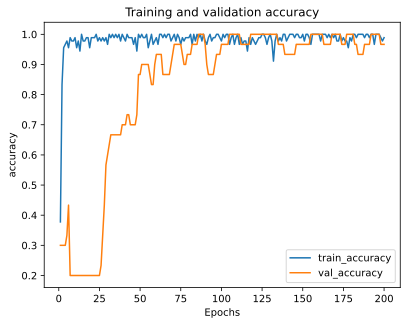

In [13]:
plot_metric(batched_history, 'accuracy')

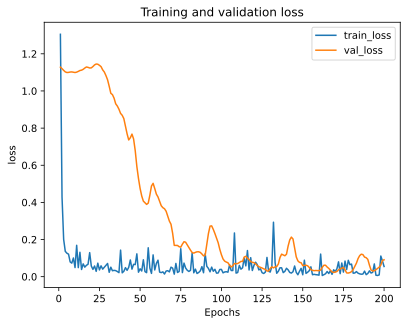

In [14]:
plot_metric(batched_history, 'loss')

In [15]:
batched_model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.3215 - accuracy: 0.8333 - 18ms/epoch - 18ms/step


[0.3215343654155731, 0.8333333134651184]

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input

# Supongamos que ya tienes los datos en los arrays X e y
# X = data[['Production budget $', 'movie_numberOfVotes', 'director_name']]
# y = data[['Worldwide gross $']]

# Convertir los datos a tipo float
X = X.astype(float)
y = y.astype(float)

# Escalar las características para que estén en el mismo rango
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir la arquitectura de la red neuronal
model = Sequential()
model.add(Input(shape=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1))  # Capa de salida para la predicción de "Worldwide gross $"

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print("Loss en el conjunto de prueba:", loss)

# Realizar predicciones
predictions = model.predict(X_test)

# Imprimir algunas predicciones y sus valores reales
for i in range(5):
    print("Predicción:", predictions[i][0], "\tValor real:", y_test[i][0])
